In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

estimated US population in 1997:  271.4 million
predicted month when the US population reached 300 million:  APR 2006


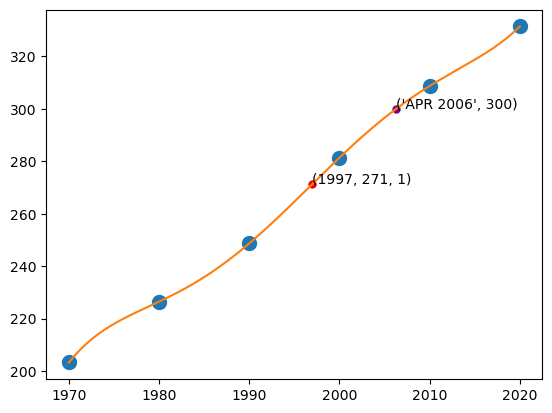

In [2]:
def interpN(x, y, xx):
  n = len(x)
  DD = y
  for m in range(1, n):
    for k in range(n-1,m-1,-1):
      DD[k] = (DD[k] - DD[k-1]) / (x[k] - x[k - m])
  yy = np.zeros(len(xx))
  for k in range(n-1,-1,-1):
    yy = DD[k] + (xx-x[k])*yy
  return yy

x_values = [1970, 1980, 1990, 2000, 2010, 2020]
y_values = [203.3, 226.5, 248.7, 281.4, 308.7, 331.4]

plt.plot(x_values,y_values,'o',markersize=10)
xx = np.linspace(min(x_values),max(x_values), 1000)
yy = interpN(x_values,y_values,xx)

p1 = np.polyfit(xx,yy, len(x_values)-1)
y = 300

find = lambda x: np.polyval(p1,x) - y
year = fsolve(find, 2000)
monthfrac, yearint = math.modf(year[0])
monthfl = monthfrac/(1/12)

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEPT', 'OCT', 'NOV', 'DEC']

if 0 <= monthfl < 12:
    month = months[int(monthfl)]
else:
    month = np.NaN
    print("invalid month value")

print("estimated US population in 1997: ", round(np.polyval(p1,1997), 1), "million")
print("predicted month when the US population reached 300 million: ", month,int(yearint))

plt.plot(1997, np.polyval(p1,1997), 'o', markersize=5, color='red')
plt.plot(year, y, 'o', markersize=5, color='purple')
plt.annotate((1997, round(np.polyval(p1,1997)),1), (1997, np.polyval(p1,1997)))
plt.annotate((str(month)+" "+str(int(yearint)), round(y,1)), (year, y))
plt.plot(xx, yy)
plt.show()


In [3]:
f = lambda x: (1-x**2)**(1/2)

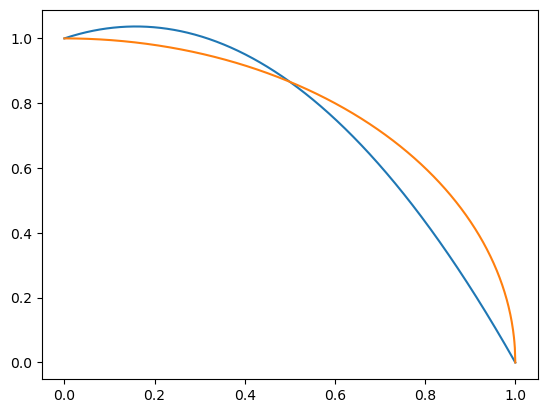

coefficients for the 2 degree polynomial interpolation: 
 [-1.46410162  0.46410162  1.        ]


In [6]:
step = 0.5
x_grid = np.arange(0,1.01,step)
y_grid = f(x_grid)
p1 = np.polyfit(x_grid,y_grid,len(x_grid)-1)
xx = np.linspace(0,1,1000)
yy = np.polyval(p1,xx)
plt.plot(xx,yy)
plt.plot(xx, f(xx))
plt.show()
print("coefficients for the 2 degree polynomial interpolation: \n", np.polyfit(xx,yy,len(x_grid)-1))

C:\Users\jamil\AppData\Local\Temp\ipykernel_14208\3333792681.py:4: RankWarning: Polyfit may be poorly conditioned
  p1 = np.polyfit(x_grid,y_grid,len(x_grid)-1)


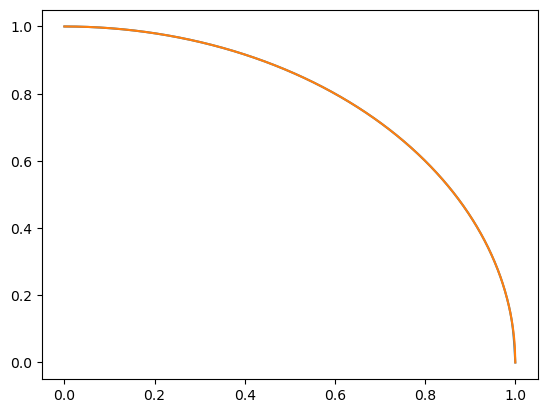

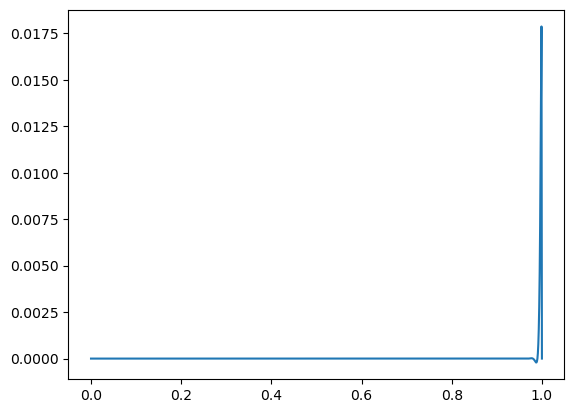

greatest difference between the approximation and values of f(x): 
 0.017866896826109688


In [10]:
step = 0.01
x_grid = np.arange(0,1.01,step)
y_grid = f(x_grid)
p1 = np.polyfit(x_grid,y_grid,len(x_grid)-1)
xx = np.linspace(0,1,1000)
yy = np.polyval(p1,xx)
plt.plot(xx,yy)
plt.plot(xx, f(xx))
plt.show()
plt.plot(xx,f(xx)-yy)
plt.show()
print("greatest difference between the approximation and values of f(x): \n",max(abs(f(xx)-yy)))